In [68]:
import pandas as pd 
import numpy as np 
import subprocess
import matplotlib.pyplot as plt 
from IPython.display import SVG

In [63]:
results = pd.read_csv("../otherScripts/hpsweep/sweepResults.txt")
results

,kappa,tau_stdp,tau_sr,asymm,frac,R2,skill,area,L2
0,1.00,0.030,5.0,0.90,0.75,0.68004,-3.58047,0.54421,0.50562
1,1.00,0.030,3.0,0.80,0.50,0.93367,-0.96781,0.22433,0.22747
2,0.10,0.030,4.0,0.90,1.00,0.86467,-1.74486,0.33011,0.30980
3,0.50,0.030,4.0,0.90,0.50,0.94133,-0.73497,0.21537,0.19576
4,0.50,0.025,4.0,0.90,1.00,0.78194,-2.50093,0.45317,0.39511
...,...,...,...,...,...,...,...,...,...
211,0.10,0.025,4.0,0.95,1.00,0.92481,-0.98539,0.24209,0.22407
212,0.10,0.025,5.0,0.80,0.75,0.75959,-2.65643,0.45884,0.40362
213,0.01,0.030,4.0,0.90,0.75,0.84336,-1.99316,0.35929,0.33779
214,0.10,0.030,5.0,0.95,1.00,0.92211,-0.99173,0.25054,0.21991


In [85]:
results.sort_values('area')['kappa'].iloc[0]

0.5

In [91]:
for i in range(10):
    kappa = int(1000*results.sort_values('area')['kappa'].iloc[i])
    tau_sr = int(1000*results.sort_values('area')['tau_sr'].iloc[i])
    tau_stdp = int(1000*results.sort_values('area')['tau_stdp'].iloc[i])
    asymm = int(1000*results.sort_values('area')['asymm'].iloc[i])
    frac = int(1000*results.sort_values('area')['frac'].iloc[i])
    figpath = "../figures/clusterSweep/%g_%g_%g_%g_%g.svg" %(kappa,tau_sr,tau_stdp,asymm,frac)
    !cp $figpath ../figures/clusterSweep/top10
    newfigpath = "../figures/clusterSweep/top10/%g_%g_%g_%g_%g.svg" %(kappa,tau_sr,tau_stdp,asymm,frac)
    newerfigpath = "../figures/clusterSweep/top10/%g_%g_%g_%g_%g_%g.svg" %(i+1,kappa,tau_sr,tau_stdp,asymm,frac)
    !mv $newfigpath $newerfigpath

mv: rename newfigpath to newerfigpath: No such file or directory
mv: rename newfigpath to newerfigpath: No such file or directory
mv: rename newfigpath to newerfigpath: No such file or directory
mv: rename newfigpath to newerfigpath: No such file or directory
mv: rename newfigpath to newerfigpath: No such file or directory
mv: rename newfigpath to newerfigpath: No such file or directory
mv: rename newfigpath to newerfigpath: No such file or directory
mv: rename newfigpath to newerfigpath: No such file or directory
mv: rename newfigpath to newerfigpath: No such file or directory
mv: rename newfigpath to newerfigpath: No such file or directory


(array([ 5.,  5.,  4.,  2.,  4.,  2.,  2.,  5., 10.,  7.,  2.,  4.,  4.,
         4.,  3.,  8.,  5.,  9.,  2.,  1.,  4.,  6.,  7.,  7.,  9.,  2.,
         4.,  4.,  4.,  4.,  3.,  3.,  7.,  3.,  1.,  3.,  2.,  6.,  3.,
         4.,  1.,  2.,  1.,  3.,  0.,  1.,  1.,  1.,  3.,  2.,  0.,  2.,
         1.,  0.,  0.,  1.,  2.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  2.,  2.,  1.,  0.,
         0.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  2.,  0.,  0.,  0.,  0.,  2.,  1.]),
 array([0.20951  , 0.2162576, 0.2230052, 0.2297528, 0.2365004, 0.243248 ,
        0.2499956, 0.2567432, 0.2634908, 0.2702384, 0.276986 , 0.2837336,
        0.2904812, 0.2972288, 0.3039764, 0.310724 , 0.3174716, 0.3242192,
        0.3309668, 0.3377144, 0.344462 , 0.3512096, 0.3579572, 0.3647048,
        0.3714524, 0.3782   , 0.3849476, 0.3916952, 0.3984428, 0.4051904,
        0.411938 , 0.4186856, 0.4254332, 0.4321808, 0.4389284, 0

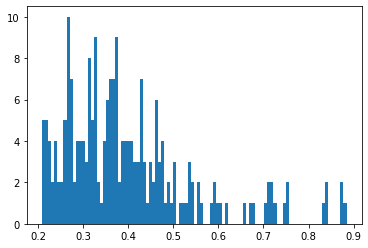

In [90]:
plt.hist(results['area'],bins=100)

In [9]:
#Global best params 
id_R2 = results['R2'].argsort()[::-1][0]
id_skill = results['skill'].argsort()[::-1][0]
id_area = results['area'].argsort()[0]
id_L2 = results['L2'].argsort()[0]

print("            kappa             tau_stdp      tau_sr          asymm             frac")
print("R2:         %.2f              %.2f          %.2f            %.2f              %.2f" %(results['kappa'][id_R2].mean(),results['tau_stdp'][id_R2].mean(),results['tau_sr'][id_R2].mean(),results['asymm'][id_R2].mean(),results['frac'][id_R2].mean()))
print("skill:      %.2f              %.2f          %.2f            %.2f              %.2f" %(results['kappa'][id_skill].mean(),results['tau_stdp'][id_skill].mean(),results['tau_sr'][id_skill].mean(),results['asymm'][id_skill].mean(),results['frac'][id_skill].mean()))
print("area:       %.2f              %.2f          %.2f            %.2f              %.2f" %(results['kappa'][id_area].mean(),results['tau_stdp'][id_area].mean(),results['tau_sr'][id_area].mean(),results['asymm'][id_area].mean(),results['frac'][id_area].mean()))
print("L2:         %.2f              %.2f          %.2f            %.2f              %.2f" %(results['kappa'][id_L2].mean(),results['tau_stdp'][id_L2].mean(),results['tau_sr'][id_L2].mean(),results['asymm'][id_L2].mean(),results['frac'][id_L2].mean()))


#And for each tau_sr

            kappa             tau_stdp      tau_sr          asymm             frac
R2:         2.00              0.02          2.00            0.90              0.80
skill:      2.00              0.02          4.00            0.90              0.80
area:       0.50              0.03          4.00            0.90              0.60
L2:         0.50              0.03          4.00            0.90              0.60


In [10]:
top = 5

id_R2 = results['R2'].argsort()[::-1][:top]
id_skill = results['skill'].argsort()[::-1][:top]
id_area = results['area'].argsort()[:top]
id_L2 = results['L2'].argsort()[:top]

print("            kappa             tau_stdp          asymm             frac")
print("R2:         %.2f +- %.2f      %.2f +- %.2f      %.2f +- %.2f      %.2f +- %.2f" %(results['kappa'][id_R2].mean(),results['kappa'][id_R2].std(),results['tau_stdp'][id_R2].mean(),results['tau_stdp'][id_R2].std(),results['asymm'][id_R2].mean(),results['asymm'][id_R2].std(),results['frac'][id_R2].mean(),results['frac'][id_R2].std()))
print("skill:      %.2f +- %.2f      %.2f +- %.2f      %.2f +- %.2f      %.2f +- %.2f" %(results['kappa'][id_skill].mean(),results['kappa'][id_skill].std(),results['tau_stdp'][id_skill].mean(),results['tau_stdp'][id_skill].std(),results['asymm'][id_skill].mean(),results['asymm'][id_skill].std(),results['frac'][id_skill].mean(),results['frac'][id_skill].std()))
print("area:       %.2f +- %.2f      %.2f +- %.2f      %.2f +- %.2f      %.2f +- %.2f" %(results['kappa'][id_area].mean(),results['kappa'][id_area].std(),results['tau_stdp'][id_area].mean(),results['tau_stdp'][id_area].std(),results['asymm'][id_area].mean(),results['asymm'][id_area].std(),results['frac'][id_area].mean(),results['frac'][id_area].std()))
print("L2:         %.2f +- %.2f      %.2f +- %.2f      %.2f +- %.2f      %.2f +- %.2f" %(results['kappa'][id_L2].mean(),results['kappa'][id_L2].std(),results['tau_stdp'][id_L2].mean(),results['tau_stdp'][id_L2].std(),results['asymm'][id_L2].mean(),results['asymm'][id_L2].std(),results['frac'][id_L2].mean(),results['frac'][id_L2].std()))


            kappa             tau_stdp          asymm             frac
R2:         0.50 +- 0.00      0.03 +- 0.00      0.90 +- 0.00      0.60 +- 0.00
skill:      0.50 +- 0.00      0.03 +- 0.00      0.90 +- 0.00      0.62 +- 0.04
area:       0.60 +- 0.22      0.03 +- 0.00      0.88 +- 0.04      0.62 +- 0.04
L2:         0.50 +- 0.00      0.03 +- 0.00      0.90 +- 0.00      0.62 +- 0.04


In [32]:
results['frac'][id_R2].mean()

0.6799999999999999